In [1]:
from datetime import datetime

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import multivariate_normal
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Часть I: О теореме Байеса
Первая часть состоит из двух вопросов и одного задания. Смысл её в том, чтобы провести вероятностные рассуждения в ситуациях, когда модель сама по себе очень простая, но её ещё надо правильно построить, правильно отобразить жизненную ситуацию. Поэтому на первые два вопроса рекомендую давать развёрнутые ответы; эти ответы лучше писать прямо в ноутбуке, LaTeX в jupyter работает на вполне достаточном для нас уровне.
## Задание 1
Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.


# Ответ
Прокурору необходимо посчитать вероятность что подозреваемый невиновен, при редкой группе крови. Тогда 1 минус эта вероятность и будет давать вероятность что подозреваемый убийца, при редкой группе крови. А прокурор считает 1 минус вероятность иметь редкую группу крови если подозреваемый невиновен, что само собой является неверным.

## Задание 2
Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?

# Ответ
Адвокату необходимо оценить вероятность подозреваемому быть убийцей, при совпадении группы крови. По теореме Байеса это должно быть равно: 
{Вероятность человеку иметь группу при условии убийства (в нашем случае 1)} * {вероятность подозреваемому быть убийцей(единица делить на количество подозреваемых)} / {вероятность иметь группу крови}

Очевидно, что адвокат схитрил и вместо {единица делить на количество подозреваемых} подставил {единица делить на количество людей с такой болезнью}

## Задание 3
Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.

Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).

Помогите медикам: постройте зависимости апостериорной вероятности болезни после положтельного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?

# Ответ

In [2]:
def posterior_sick(false_positives = 0.05, false_negatives = 0.05):
    """
    p(sick|positive) = p(positive|sick) * p(sick) / p(positive)
    """
    sick = 0.01
    true_positives = 1 - false_negatives
    return true_positives * sick / (true_positives * sick + false_positives * (1 - sick))

In [3]:
def posterior_health(false_positives = 0.05, false_negatives = 0.05):
    """
    p(health|negative) = p(negative|health) * p(health) / p(negative)
    """
    sick = 0.01
    true_negatives = 1 - false_positives
    return true_negatives * (1 - sick) / (false_negatives * sick + true_negatives * (1 - sick))

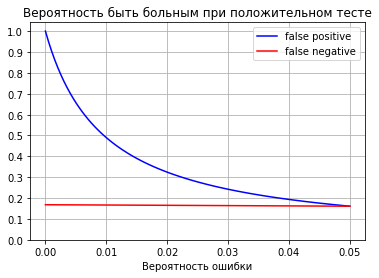

In [4]:
x = np.linspace(0.00, 0.05, 100)

plt.plot(x, posterior_sick(false_positives=x), label="false positive", color="b")
plt.plot(x, posterior_sick(false_negatives=x), label="false negative", color="r")
plt.xlabel("Вероятность ошибки")
plt.title("Вероятность быть больным при положительном тесте")
plt.grid(True);
plt.xticks(np.arange(0, 0.055, 0.01))
plt.yticks(np.arange(0, 1.05, 0.1))
plt.legend(loc="best")

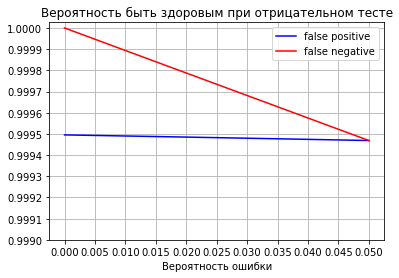

In [5]:
x2 = np.linspace(0.00, 0.05, 100)

plt.plot(x2, posterior_health(false_positives=x), label="false positive", color="b")
plt.plot(x2, posterior_health(false_negatives=x), label="false negative", color="r")
plt.xlabel("Вероятность ошибки")
plt.title("Вероятность быть здоровым при отрицательном тесте")
plt.grid(True)
plt.xticks(np.arange(0, 0.055, 0.005))
plt.yticks(np.arange(0.999, 1.0001, 0.0001))
plt.legend(loc="best")

Для ответа необходимо исследовать 2 графика. Исходя из них видно, что лучший результат дает уменьшение false positive. Вероятность быть здоровым не сильно меняется, однако вероятность быть больным при положительном тесте очень сильно растет.

# Часть II: О линейной регрессии
Эта часть первого домашнего задания связана с анализом конкретного датасета. Датасет давайте возьмём довольно релевантный реальной жизни; он доступен по следующей ссылке:
https://ourworldindata.org/coronavirus-source-data


## Задание 1
Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.


## Ответ

In [6]:
df = pd.read_csv("owid-covid-data.csv")

In [7]:
START_DATE = datetime(2020, 3, 3)
MAY_FIRST = (datetime(2020, 5, 1) - START_DATE).days
JUNE_FIRST = (datetime(2020, 6, 1) - START_DATE).days
SEPTEMBER_FIRST = (datetime(2020, 9, 1) - START_DATE).days

In [8]:
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
df["y"] = df["total_cases"]
df["x"] = (df["date"] - START_DATE).dt.days
df = df[df["location"] == "Russia"].reset_index(drop=True)

ru = pd.DataFrame()
ru["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
ru["total_cases"] = df["total_cases"]
ru["new_cases"] = [i if i > 0 else 1 for i in df["new_cases"] ]
ru["x"] = (df["date"] - START_DATE).dt.days
ru = ru[ru["x"] >= 0]

In [9]:
ru

,date,total_cases,new_cases,x
32,2020-03-03,3.0,1.0,0
33,2020-03-04,3.0,1.0,1
34,2020-03-05,4.0,1.0,2
35,2020-03-06,13.0,9.0,3
36,2020-03-07,13.0,1.0,4
...,...,...,...,...
387,2021-02-21,4117992.0,12568.0,355
388,2021-02-22,4130447.0,12455.0,356
389,2021-02-23,4142126.0,11679.0,357
390,2021-02-24,4153735.0,11609.0,358


In [10]:
train_df = ru[ru["x"] < 50].reset_index(drop=True)
test_df = ru[ru["x"] >= 50].reset_index(drop=True)

## Задание 2
Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.

### A
Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.

In [11]:
est = LinearRegression()
est.fit(train_df["x"].values.reshape(-1, 1), np.log(train_df["total_cases"]))

LinearRegression()

Text(0, 0.5, 'Total cases')

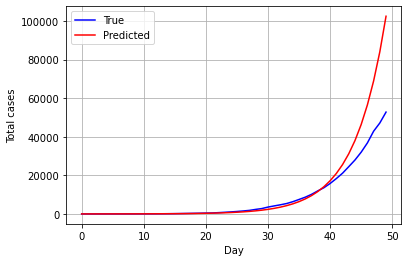

In [12]:
pred = est.predict(train_df["x"].values.reshape(-1, 1))
plt.plot(
    train_df["x"], 
    train_df["total_cases"],
    color="b",
    label="True"
)
plt.plot(
    train_df["x"], 
    np.exp(pred), 
    color="r",
    label="Predicted"
)
plt.legend(loc="best")
plt.grid(True);
plt.xlabel("Day")
plt.ylabel("Total cases")

### B

Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

In [13]:
pred = est.predict(train_df["x"].values.reshape(-1, 1))
sigma_noise = np.mean((np.log(train_df["total_cases"]) - pred)**2)

In [14]:
def bayesian_update(mu, sigma, x, y, sigma_noise):
    sigma_n = np.linalg.inv(np.linalg.inv(sigma) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x), x) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x), y))
    return mu_n, sigma_n

In [15]:
x_matrix = np.column_stack([np.ones(train_df.shape[0]), train_df["x"]])

mu, sigma = bayesian_update(
    np.zeros(2),
    10**3 * np.eye(2), 
    x_matrix,
    np.log(train_df["total_cases"]).values, 
    sigma_noise
)

In [16]:
print(f"Mean of W:\n{mu}")
print(f"Variance of W:\n{sigma}")

Mean of W:
[1.82073506 0.19829098]
Variance of W:
[[ 1.15248767e-03 -3.49238688e-05]
 [-3.49238688e-05  1.42546446e-06]]


### C

Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).

In [17]:
n_samples = 200
w = np.random.multivariate_normal(mu, sigma, n_samples)

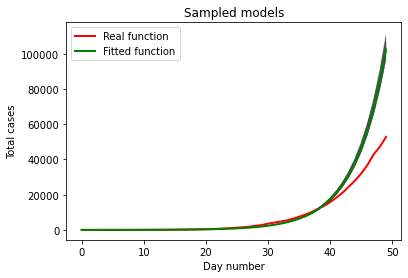

In [18]:
for i in range(n_samples):
    plt.plot(train_df["x"], np.exp(x_matrix.dot(w[i])), linewidth=.1, color="0.3")
plt.plot(train_df["x"], train_df["total_cases"], label="Real function", c="r", linewidth=2)
plt.plot(train_df["x"], np.exp(pred), label="Fitted function", c="g", linewidth=2)
plt.xlabel("Day number")
plt.ylabel("Total cases")
plt.title("Sampled models")
plt.legend(loc="best")

In [19]:
x = pd.Series([
    MAY_FIRST,
    JUNE_FIRST,
    SEPTEMBER_FIRST
])

pred_matrix = np.column_stack([np.ones(3), x])

res1 = np.exp(w.dot(pred_matrix.T))

Text(0.5, 1.0, 'MAY_FIRST Prediction distribution')

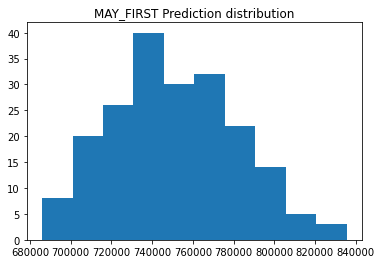

In [22]:
plt.hist(res1[:, 0])
plt.title("MAY_FIRST Prediction distribution")

Text(0.5, 1.0, 'SEPTEMBER_FIRST Prediction distribution')

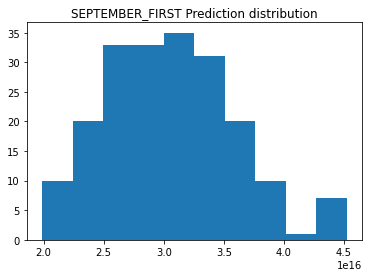

In [23]:
plt.hist(res1[:, 2])
plt.title("SEPTEMBER_FIRST Prediction distribution")

Text(0.5, 1.0, 'JUNE_FIRST Prediction distribution')

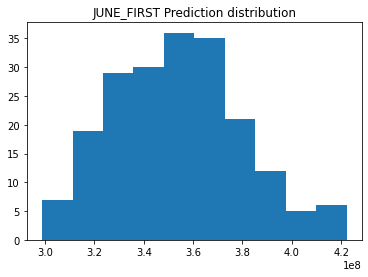

In [24]:
plt.hist(res1[:, 1])
plt.title("JUNE_FIRST Prediction distribution")

In [26]:
print('1 мая')
print(f"median {round(np.quantile(res1[:, 0], 0.5))}")
print(f"10 quantile {round(np.quantile(res1[:, 0], 0.1))}")
print(f"90 quantile {round(np.quantile(res1[:, 0], 0.9))}")
print(f"True value: {test_df[test_df['x'] == MAY_FIRST]['total_cases'].iloc[0]}")

1 мая
median 748806
10 quantile 712391
90 quantile 790977
True value: 114431.0


In [27]:
print('1 июня')
print(f"median {round(np.quantile(res1[:, 1], 0.5))}")
print(f"10 quantile {round(np.quantile(res1[:, 1], 0.1))}")
print(f"90 quantile {round(np.quantile(res1[:, 1], 0.9))}")
print(f"True value: {test_df[test_df['x'] == JUNE_FIRST]['total_cases'].iloc[0]}")

1 июня
median 353486683
10 quantile 321124624
90 quantile 388055037
True value: 414328.0


In [28]:
print('1 сентября')
print(f"median {round(np.quantile(res1[:, 2], 0.5))}")
print(f"10 quantile {round(np.quantile(res1[:, 2], 0.1))}")
print(f"90 quantile {round(np.quantile(res1[:, 2], 0.9))}")
print(f"True value: {test_df[test_df['x'] == SEPTEMBER_FIRST]['total_cases'].iloc[0]}")

1 сентября
median 30286580379954536
10 quantile 23941432353283840
90 quantile 37132449853911960
True value: 997072.0


## Задание 3

Предсказания экспоненциальной модели наверняка получились грустными. Но это, конечно, чересчур пессимистично — экспоненциальный рост в природе никак не может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана

### A

Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.

In [29]:
est = LinearRegression()
x = np.column_stack([train_df["x"], train_df["x"] ** 2])
y = train_df["new_cases"]
y.clip(lower=1, inplace=True)
y = np.log(y).values
est.fit(x, y)

LinearRegression()

Text(0, 0.5, 'Total cases')

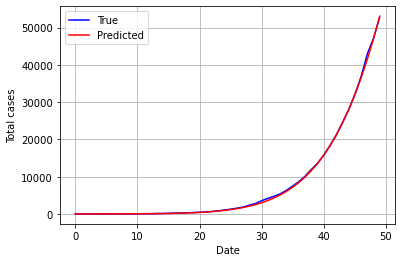

In [30]:
pred = est.predict(x)


plt.plot(
    train_df["x"], 
    train_df["total_cases"],
    color="b",
    label="True"
)
plt.plot(
    train_df["x"], 
    np.exp(pred).cumsum(), 
    color="r",
    label="Predicted"
)
plt.legend(loc="best")
plt.grid(True);
plt.xlabel("Date")
plt.ylabel("Total cases")

### B

Обучите эти параметры на датасете случаев коронавируса в России. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели.

In [31]:
pred = est.predict(x)
sigma_noise = np.mean((y - pred)**2)

In [32]:

x_matrix = np.column_stack([np.ones_like(train_df["x"]), x])

mu, sigma = bayesian_update(
    np.zeros(3),
    10**3 * np.eye(3), 
    x_matrix,
    y, 
    sigma_noise
)

In [33]:
print(f"Mean of W:\n{mu}")
print(f"Variance of W:\n{sigma}")

Mean of W:
[-0.39658641  0.2756225  -0.00182979]
Variance of W:
[[ 9.52394107e-03 -7.69480531e-04  1.29542176e-05]
 [-7.69480531e-04  8.48437326e-05 -1.61928267e-06]
 [ 1.29542176e-05 -1.61928267e-06  3.30466208e-08]]


### C

Посэмплируйте много разных сигмоид из апостериорного распределения, постройте графики. Сколько, исходя из этих сэмплов, будет всего случаев коронавируса в России? Постройте эмпирическое предсказательное распределение, нарисуйте графики. Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии (90-й процентиль в выборке числа случаев)? В оптимистичном сценарии (10-й процентиль)?

In [34]:
n_samples = 200
w = np.random.multivariate_normal(mu, sigma, n_samples)

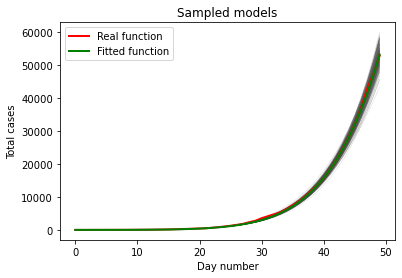

In [35]:
for i in range(n_samples):
    plt.plot(train_df["x"], np.exp(w[i].dot(x_matrix.T)).cumsum(), linewidth=.1, color="0.3")
plt.plot(train_df["x"], train_df["total_cases"], label="Real function", c="r", linewidth=2)
plt.plot(train_df["x"], np.exp(pred).cumsum(), label="Fitted function", c="g", linewidth=2)
plt.xlabel("Day number")
plt.ylabel("Total cases")
plt.title("Sampled models")
plt.legend(loc="best")

In [36]:
x = np.arange(SEPTEMBER_FIRST + 1)

pred_matrix = np.column_stack([np.ones(x.shape[0]), x, x**2])

res = np.exp(w.dot(pred_matrix.T)).cumsum(1)

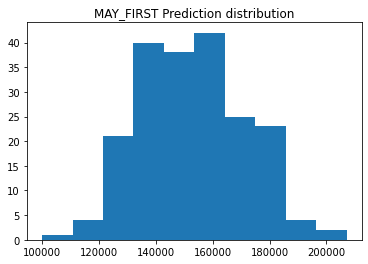

In [37]:
plt.hist(res[:, MAY_FIRST]);
plt.title("MAY_FIRST Prediction distribution");

Text(0.5, 1.0, 'JUNE_FIRST Prediction distribution')

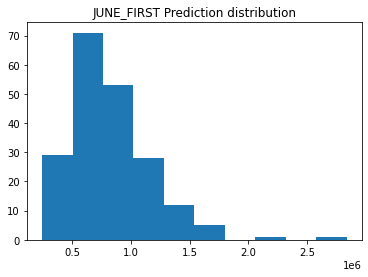

In [38]:
plt.hist(res[:, JUNE_FIRST])
plt.title("JUNE_FIRST Prediction distribution")

Text(0.5, 1.0, 'SEPTEMBER_FIRST Prediction distribution')

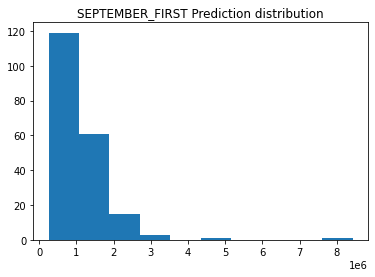

In [39]:
plt.hist(res[:, SEPTEMBER_FIRST])
plt.title("SEPTEMBER_FIRST Prediction distribution")

In [40]:
print('1 мая')
print(f"median {round(np.quantile(res[:, MAY_FIRST], 0.5))}")
print(f"10 quantile {round(np.quantile(res[:, MAY_FIRST], 0.1))}")
print(f"90 quantile {round(np.quantile(res[:, MAY_FIRST], 0.9))}")
print(f"True value: {test_df[test_df['x'] == MAY_FIRST]['total_cases'].iloc[0]}")

1 мая
median 151784
10 quantile 131175
90 quantile 180049
True value: 114431.0


In [41]:
print('1 июня')
print(f"median {round(np.quantile(res[:, JUNE_FIRST], 0.5))}")
print(f"10 quantile {round(np.quantile(res[:, JUNE_FIRST], 0.1))}")
print(f"90 quantile {round(np.quantile(res[:, JUNE_FIRST], 0.9))}")
print(f"True value: {test_df[test_df['x'] == JUNE_FIRST]['total_cases'].iloc[0]}")

1 июня
median 763277
10 quantile 459519
90 quantile 1266635
True value: 414328.0


In [42]:
print('1 сентября')
print(f"median {round(np.quantile(res[:, SEPTEMBER_FIRST], 0.5))}")
print(f"10 quantile {round(np.quantile(res[:, SEPTEMBER_FIRST], 0.1))}")
print(f"90 quantile {round(np.quantile(res[:, SEPTEMBER_FIRST], 0.9))}")
print(f"True value: {test_df[test_df['x'] == SEPTEMBER_FIRST]['total_cases'].iloc[0]}")

1 сентября
median 944347
10 quantile 504188
90 quantile 1877588
True value: 997072.0
